# Dynamic Stochastic General Equilibrium (DSGE) Models

**Dynamic Stochastic General Equilibrium (DSGE) Models** are advanced macroeconomic models used to analyze the behavior of an economy over time. These models integrate randomness (stochastic elements) and the optimization decisions of economic agents (households, firms, etc.) based on expectations and constraints.

### Key Characteristics:
1. **Dynamic**: DSGE models capture the evolution of economic variables over time.
2. **Stochastic**: They incorporate random shocks (e.g., technological changes, policy shifts) that influence economic outcomes.
3. **General Equilibrium**: These models account for the interactions between all agents in the economy, ensuring that supply and demand are balanced across all markets.

### Applications:
DSGE models are extensively used for macroeconomic forecasting, policy analysis, and understanding the effects of economic shocks. They are commonly employed by central banks and policymakers to evaluate the impact of monetary and fiscal policies, as well as to simulate economic fluctuations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler

# Generate Synthetic Data for DSGE Model

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of data points
data_size = 100000

# Simulate data for each parameter
time = np.arange(data_size)

# Agricultural Output (Y)
Y = 100 + 0.2 * time + np.random.normal(0, 5, data_size)

# Capital (K)
K = 50 + 0.1 * time + np.random.normal(0, 3, data_size)

# Labor (L)
L = 30 + 0.05 * time + np.random.normal(0, 2, data_size)

# Government Subsidy (S)
S = 10 + 0.03 * time + np.random.normal(0, 1, data_size)

# Investment (I)
I = 20 + 0.15 * time + np.random.normal(0, 4, data_size)

# Consumption (C)
C = 70 + 0.1 * time + np.random.normal(0, 3, data_size)

# Interest Rate (R)
R = 5 + 0.01 * time + np.random.normal(0, 0.5, data_size)

# Technological Shock (A)
A = 1.02 ** (0.05 * time) + np.random.normal(0, 0.02, data_size)

# Government Spending (G)
G = 40 + 0.02 * time + np.random.normal(0, 1, data_size)

# Inflation Rate (π)
π = 2 + 0.02 * time + np.random.normal(0, 0.1, data_size)

# Create DataFrame
data = pd.DataFrame({
    'Time': time,
    'Y': Y,
    'K': K,
    'L': L,
    'S': S,
    'I': I,
    'C': C,
    'R': R,
    'A': A,
    'G': G,
    'π': π
})

# Check the first few rows of the dataset
data.head()

,Time,Y,K,L,S,I,C,R,A,G,π
0,0,102.483571,53.091784,33.123681,8.600178,32.141703,66.810925,5.913118,0.994445,40.676414,2.261336
1,1,99.508678,46.633936,29.861543,10.577823,19.557607,67.639244,4.954903,1.004210,40.539750,2.036822
2,2,103.638443,51.926312,27.440929,9.939238,13.372970,72.249690,4.656328,1.004153,40.542574,1.860161
3,3,108.215149,48.442285,27.372724,9.806736,22.510157,71.553698,4.849664,1.013593,39.872872,2.049600
4,4,99.629233,49.417792,29.514698,10.887569,20.345036,71.667375,5.759855,1.004135,40.419647,2.142477


# Time Series Plot for All Variables

g:\venv\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


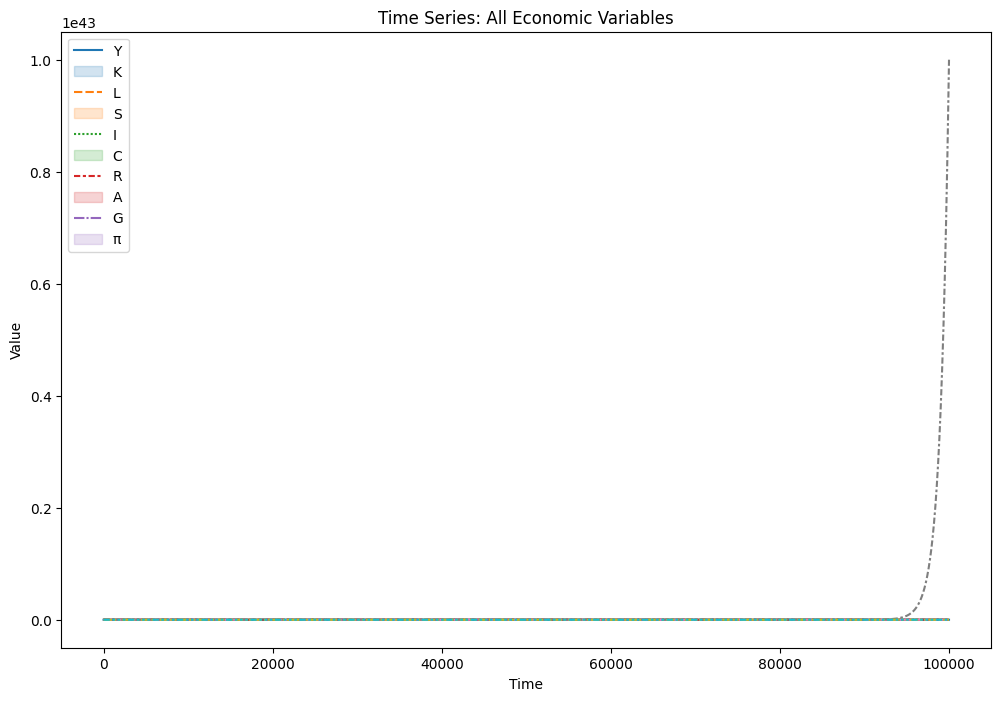

In [3]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=data[['Y', 'K', 'L', 'S', 'I', 'C', 'R', 'A', 'G', 'π']])
plt.title('Time Series: All Economic Variables')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(data.columns[1:])
plt.show()

# Agricultural Output vs Subsidy

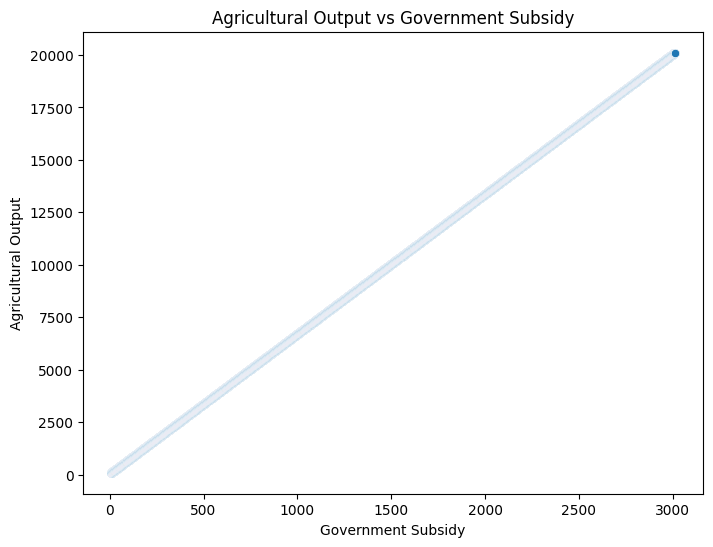

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['S'], y=data['Y'])
plt.title('Agricultural Output vs Government Subsidy')
plt.xlabel('Government Subsidy')
plt.ylabel('Agricultural Output')
plt.show()

#  Correlation

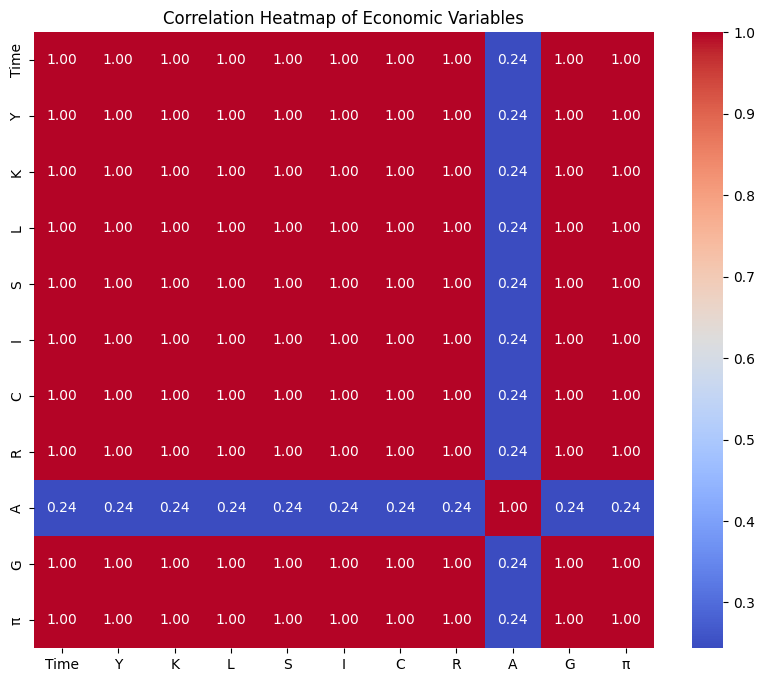

In [5]:
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Economic Variables')
plt.show()

# Subsidy (S)

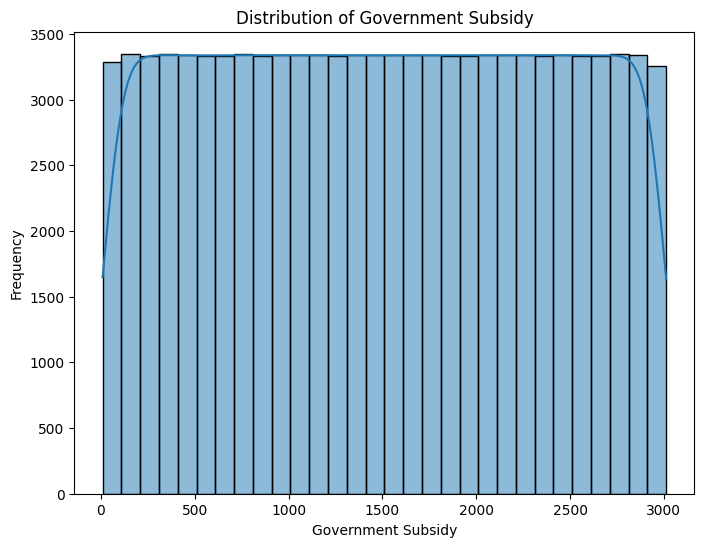

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(data['S'], bins=30, kde=True)
plt.title('Distribution of Government Subsidy')
plt.xlabel('Government Subsidy')
plt.ylabel('Frequency')
plt.show()

# Rolling Average of Agricultural Output

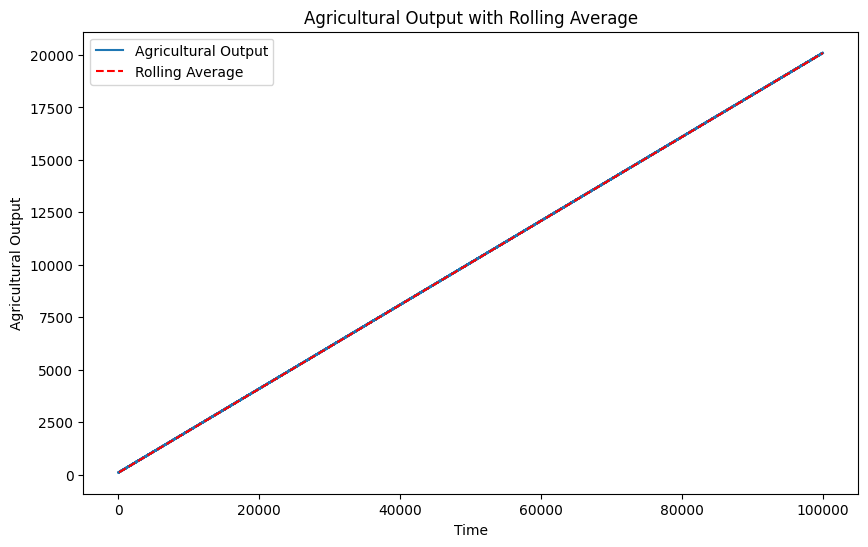

In [7]:
rolling_avg_Y = data['Y'].rolling(window=100).mean()

plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Y'], label='Agricultural Output')
plt.plot(data['Time'], rolling_avg_Y, label='Rolling Average', color='red', linestyle='--')
plt.title('Agricultural Output with Rolling Average')
plt.xlabel('Time')
plt.ylabel('Agricultural Output')
plt.legend()
plt.show()

# Investment vs Interest Rate

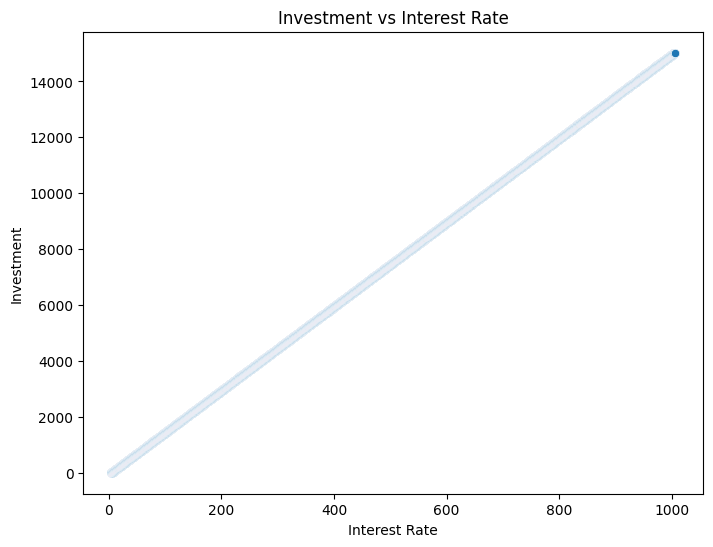

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['R'], y=data['I'])
plt.title('Investment vs Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Investment')
plt.show()

# Cumulative Sum of Agricultural Output

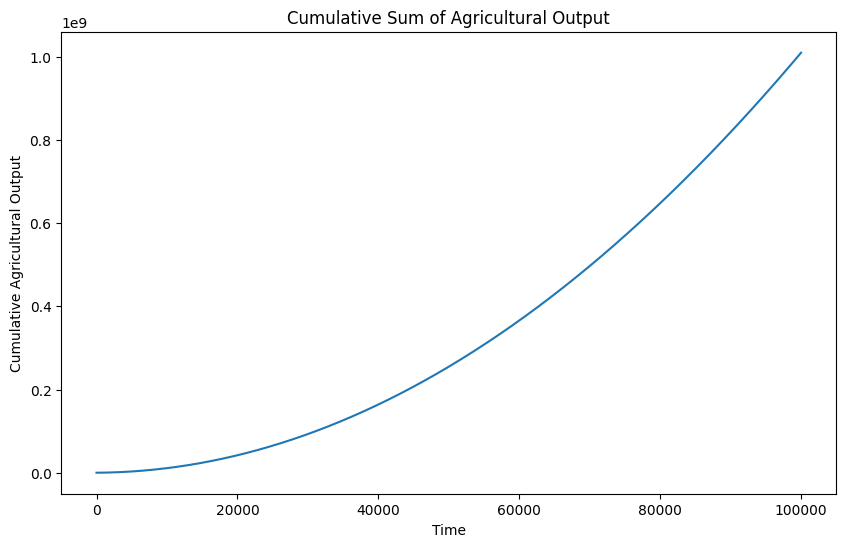

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Y'].cumsum())
plt.title('Cumulative Sum of Agricultural Output')
plt.xlabel('Time')
plt.ylabel('Cumulative Agricultural Output')
plt.show()

# Inflation Rate Over Time

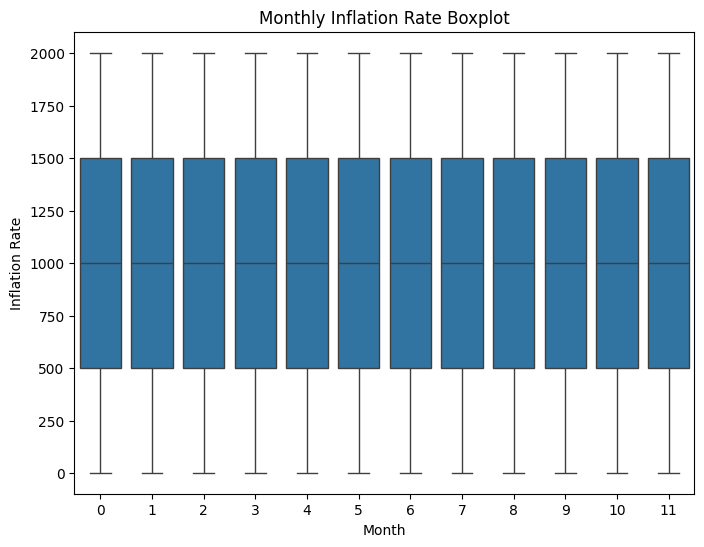

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Time'] % 12, y=data['π'])
plt.title('Monthly Inflation Rate Boxplot')
plt.xlabel('Month')
plt.ylabel('Inflation Rate')
plt.show()

# Time vs Subsidy and Output

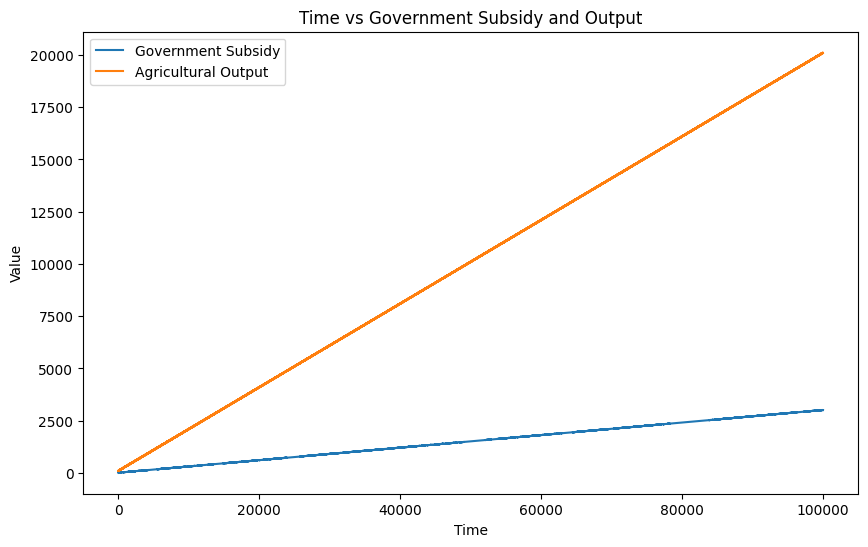

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['S'], label='Government Subsidy')
plt.plot(data['Time'], data['Y'], label='Agricultural Output')
plt.title('Time vs Government Subsidy and Output')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Interest Rate vs Capital

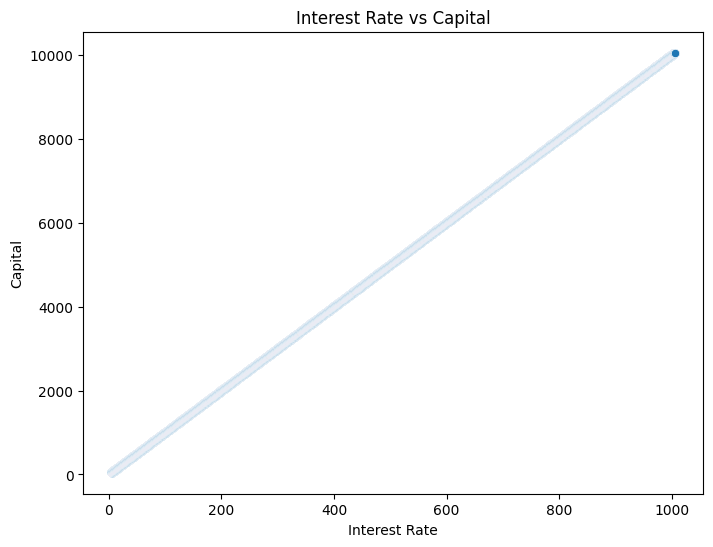

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['R'], y=data['K'])
plt.title('Interest Rate vs Capital')
plt.xlabel('Interest Rate')
plt.ylabel('Capital')
plt.show()

# Agricultural Output vs Labor

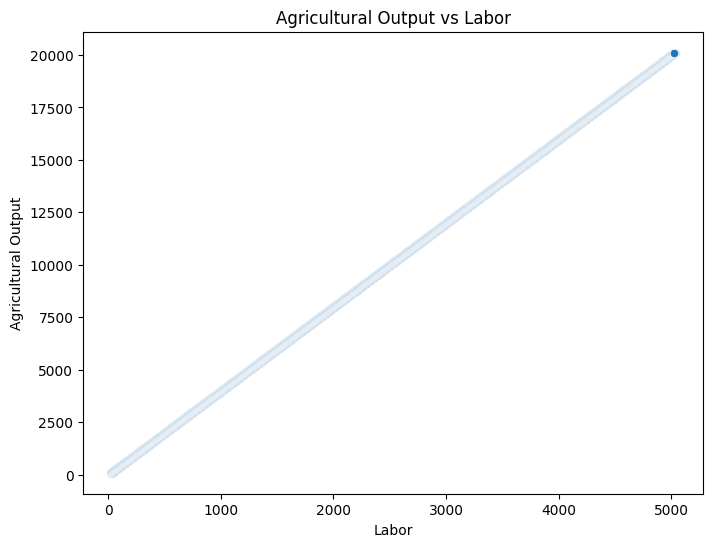

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['L'], y=data['Y'])
plt.title('Agricultural Output vs Labor')
plt.xlabel('Labor')
plt.ylabel('Agricultural Output')
plt.show()

# Time Series of Investment and Consumption

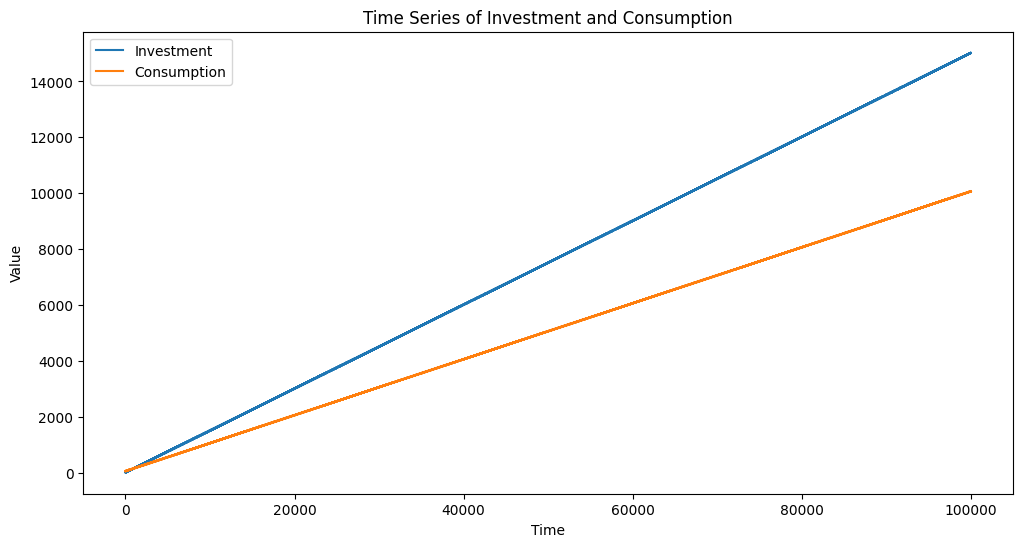

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(data['Time'], data['I'], label='Investment')
plt.plot(data['Time'], data['C'], label='Consumption')
plt.title('Time Series of Investment and Consumption')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Technological Shock (A) and Agricultural Output (Y)

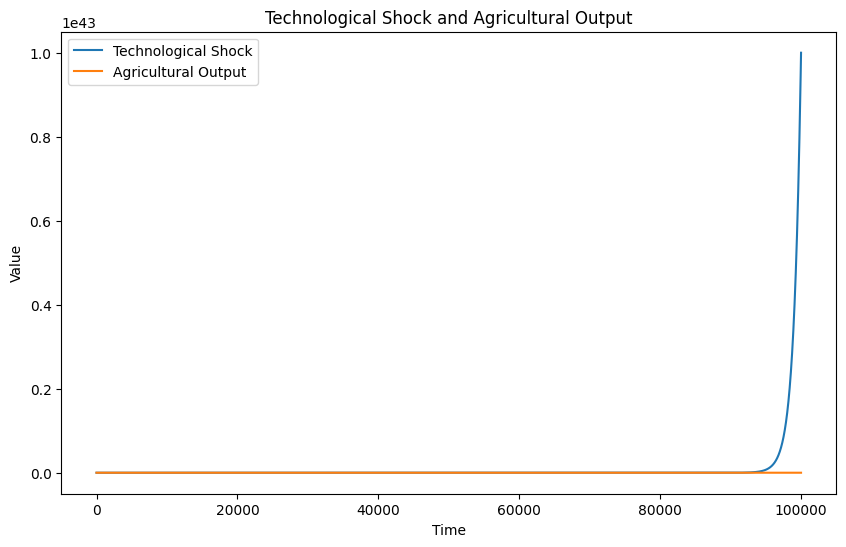

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['A'], label='Technological Shock')
plt.plot(data['Time'], data['Y'], label='Agricultural Output')
plt.title('Technological Shock and Agricultural Output')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

#  Inflation Rate vs Time

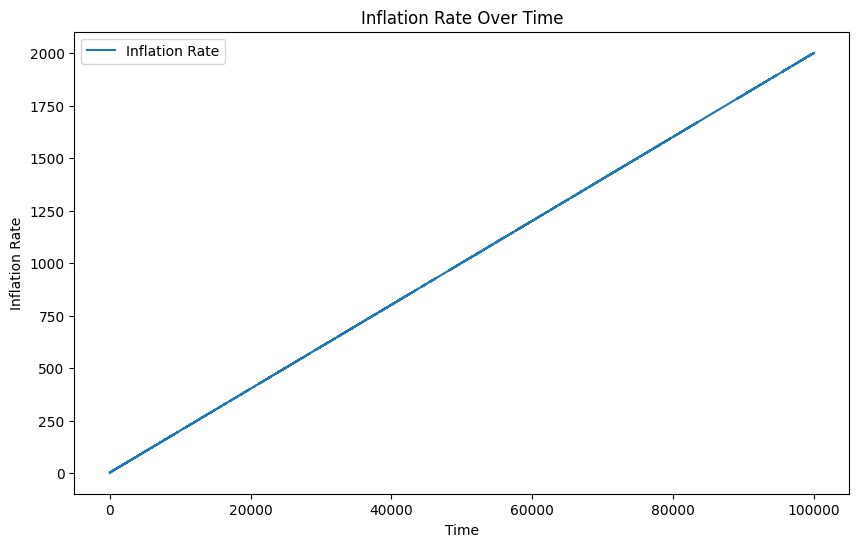

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['π'], label='Inflation Rate')
plt.title('Inflation Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Inflation Rate')
plt.legend()
plt.show()

# Interpretion
- Agricultural Output (Y) shows a positive trend with fluctuations due to random shocks, indicating growth but influenced by various factors.
- Government Subsidy (S) increases steadily, reflecting consistent government support.
- Capital (K) and Labor (L) both show positive trends, indicating that investments in capital and labor are contributing to economic growth.
- Investment (I) correlates with interest rates (R), implying higher investments when interest rates are lower.
- Inflation Rate (π) shows slight upward movement, suggesting moderate inflationary pressure.
- Technological Shock (A) boosts agricultural productivity over time, supporting long-term growth.
- Consumption (C) tracks alongside agricultural output, suggesting it is responsive to changes in output.
- Interest Rate (R) is inversely related to investment, with lower interest rates driving higher investment.
- Strong positive correlation between agricultural output and government subsidies indicates the effectiveness of subsidies in boosting output.
- Key relationships include investment and interest rates, and agricultural output and labor.
- Cumulative plots show long-term growth of agricultural output, with steady increases despite periodic shocks.

Overall, the analysis shows how key economic variables in agriculture interact, highlighting the impact of policies like subsidies and technological advances on productivity.